In [3]:
# Importing libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Loading our Dataset to Notebook:
epl_df = pd.read_csv('D:\\DA\\Data_Analyst_projects\\4)Python_EPL_data_analysis_project\\EPL_20_21.csv')
epl_df.head(10)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1
6,N'Golo Kanté,Chelsea,FRA,MF,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0


In [8]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [10]:
# Summary and statistics of our dataset:
epl_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.00,26.00,29.000,38.00
Matches,532.0,19.535714,11.840459,1.0,9.00,21.00,30.000,38.00
Starts,532.0,15.714286,11.921161,0.0,4.00,15.00,27.000,38.00
Mins,532.0,1411.443609,1043.171856,1.0,426.00,1345.00,2303.500,3420.00
Goals,532.0,1.853383,3.338009,0.0,0.00,1.00,2.000,23.00
Assists,532.0,1.287594,2.095191,0.0,0.00,0.00,2.000,14.00
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.50,573.50,1129.500,3214.00
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.00,0.00,0.000,9.00
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.00,0.00,0.000,10.00


In [11]:
# to check any null values in any column:
epl_df.isna().sum()
# we dont have any null-values

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [12]:
# we have to add num of minutes per matches column & goals per match:

epl_df['MinsPerMatch'] = (epl_df['Mins'] / epl_df['Matches']).astype(int)

epl_df['GoalsPerMatch'] = (epl_df['Goals'] / epl_df['Matches']).astype(float)

epl_df.head(5)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [14]:
# Total num of penalty goals scored in the league during the season:
Total_PenaltyGoals = epl_df['Penalty_Goals'].sum()
Total_PenaltyGoals

102

In [25]:
# Num of goals scored by Manchester City whole season:
ManCity_Goals = epl_df[epl_df['Club'] == 'Manchester City']['Goals'].sum()
ManCity_Goals

82

In [26]:
# In that 82, how many of them are Penalty:
ManCity_PenaltyGoals = epl_df[epl_df['Club'] == 'Manchester City']['Penalty_Goals'].sum()
ManCity_PenaltyGoals

5

In [43]:
# Pie chart for penalties scored and missed by top 3 teams:
# 1) Manchester City, 
 
ManCity_PenaltyGiven = epl_df[epl_df['Club'] == 'Manchester City']['Penalty_Attempted'].sum()

ManCity_PenConvRate = ((ManCity_PenaltyGoals / ManCity_PenaltyGiven)*100).round(2)

print('ManCity have given {} penalties this season and, they have scored {} of them. Their conversion rate is {}%'
      .format(ManCity_PenaltyGiven,ManCity_PenaltyGoals,ManCity_PenConvRate))




ManCity have given 9 penalties this season and, they have scored 5 of them. Their conversion rate is 55.56%


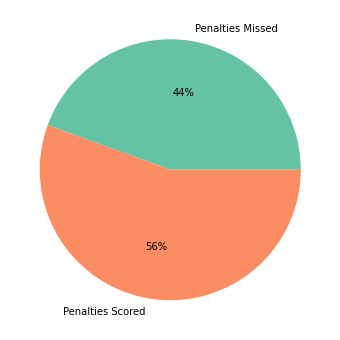

In [45]:
# Pie chart for penalties scored and missed by top 3 teams:
# 1) Manchester City, 

plt.figure(figsize=(13,6))
ManCity_missedPen = ManCity_PenaltyGiven - ManCity_PenaltyGoals

data = [ManCity_missedPen, ManCity_PenaltyGoals]
labels = ['Penalties Missed', 'Penalties Scored']
piechart_color = sns.color_palette('Set2')

plt.pie(data,labels = labels, colors = piechart_color, autopct='%.0f%%')
plt.show()

In [51]:
# Pie chart for penalties scored and missed by top 3 teams:
# 2) Manchester United:
ManUtd_PenaltyGoals = epl_df[epl_df['Club'] == 'Manchester United']['Penalty_Goals'].sum()

ManUtd_PenaltyGiven = epl_df[epl_df['Club'] == 'Manchester United']['Penalty_Attempted'].sum()

ManUtd_PenConvRate = ((ManUtd_PenaltyGoals / ManUtd_PenaltyGiven)*100).round(2)

print('ManUtd have given {} penalties this season and, they have scored {} of them. Their conversion rate is {}%'
      .format(ManUtd_PenaltyGiven,ManUtd_PenaltyGoals,ManUtd_PenConvRate))



ManUtd have given 11 penalties this season and, they have scored 10 of them. Their conversion rate is 90.91%


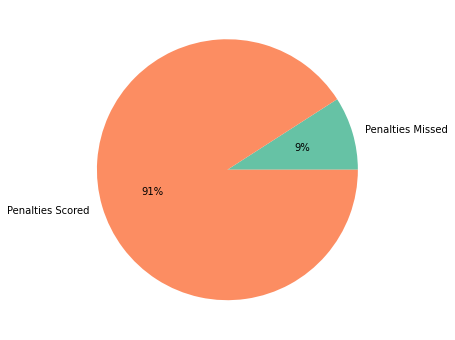

In [52]:
# Pie chart for penalties scored and missed by top 3 teams:
# 2) Manchester United:


plt.figure(figsize=(13,6))
ManUtd_missedPen = ManUtd_PenaltyGiven - ManUtd_PenaltyGoals

data2 = [ManUtd_missedPen, ManUtd_PenaltyGoals]
labels2 = ['Penalties Missed', 'Penalties Scored']
piechart_color2 = sns.color_palette('Set2')

plt.pie(data2,labels = labels2, colors = piechart_color2, autopct='%.0f%%')
plt.show()

In [55]:
# Pie chart for penalties scored and missed by top 3 teams:
# 3) Liverpool 

Liverpool_PenaltyGoals = epl_df[epl_df['Club'] == 'Liverpool FC']['Penalty_Goals'].sum()

Liverpool_PenaltyGiven = epl_df[epl_df['Club'] == 'Liverpool FC']['Penalty_Attempted'].sum()

Liverpool_PenConvRate = ((Liverpool_PenaltyGoals / Liverpool_PenaltyGiven)*100).round(2)

print('Liverpool FC have given {} penalties this season and, they have scored {} of them. Their conversion rate is {}%'
      .format(Liverpool_PenaltyGiven,Liverpool_PenaltyGoals,Liverpool_PenConvRate))


Liverpool FC have given 6 penalties this season and, they have scored 6 of them. Their conversion rate is 100.0%


In [56]:
# Unique positions in EPL:

epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [57]:
# Total num of Forwards in the league:

epl_df[epl_df['Position']=='FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [62]:
# Players from how many different nations playing in Premier league:

nations_count = np.size((epl_df['Nationality'].unique()))
print('Players from {} different nations playing in English Premier League.'.format(nations_count))

Players from 59 different nations playing in English Premier League.


<AxesSubplot:xlabel='Nationality'>

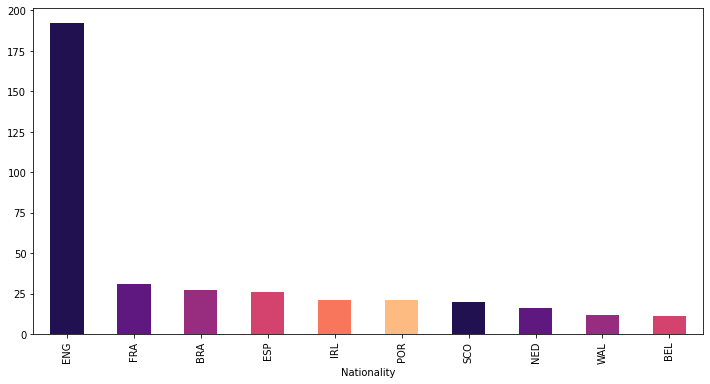

In [64]:
# nation with most num of players:

nationality = epl_df.groupby('Nationality').size().sort_values(ascending=False)

nationality.head(10).plot(figsize=(12,6), color= sns.color_palette("magma"),kind='bar')

<AxesSubplot:>

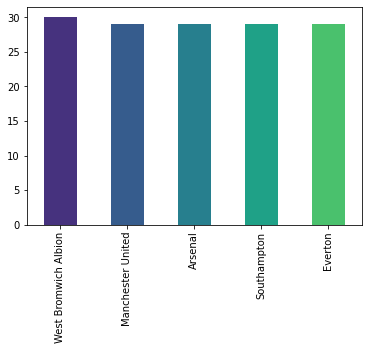

In [69]:
# Clubs with maximum num of players:

epl_df['Club'].value_counts().nlargest(5).plot(color = sns.color_palette("viridis"), kind='bar')

<AxesSubplot:>

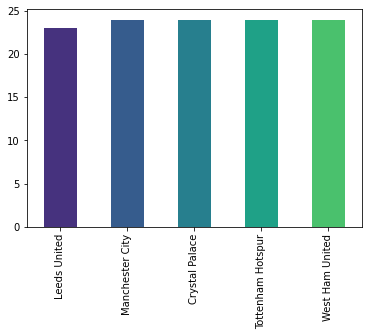

In [70]:
# Clubs with least num of players:
epl_df['Club'].value_counts().nsmallest(5).plot(color = sns.color_palette("viridis"), kind='bar')

In [72]:
# Players based on age groups:

Under20 = epl_df[epl_df['Age'] <= 20]
age20_25 = epl_df[(epl_df['Age'] > 20) & (epl_df['Age'] <= 25)]
age25_30 = epl_df[(epl_df['Age'] > 25) & (epl_df['Age'] <= 30)]
Above30 = epl_df[epl_df['Age'] > 30]

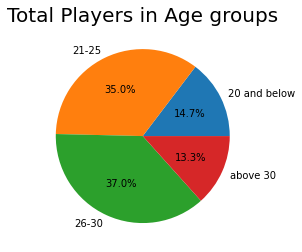

In [75]:
temp_array = np.array([Under20['Name'].count(), age20_25['Name'].count(),age25_30['Name'].count(), Above30['Name'].count()])
mylabels = ["20 and below","21-25","26-30","above 30"]
plt.title('Total Players in Age groups', fontsize=20)
plt.pie(temp_array,labels=mylabels,autopct="%.1f%%")
plt.show()

<AxesSubplot:>

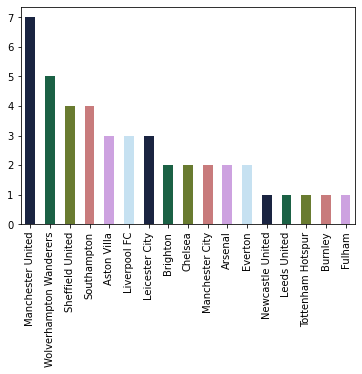

In [84]:
# total num of players who were under 20 in each club:

players_under20 = epl_df[epl_df['Age'] < 20]
players_under20['Club'].value_counts().plot(kind='bar',color=sns.color_palette("cubehelix"))

In [87]:
# Players Under 20 in Wolves:
players_under20[players_under20['Club']=='Wolverhampton Wanderers']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
326,Rayan Aït Nouri,Wolverhampton Wanderers,FRA,DF,19,21,16,1404,1,1,785,83.7,0,0,0.04,0.06,1,0,66,0.047619
329,Fábio Silva,Wolverhampton Wanderers,POR,FW,18,32,11,1369,4,3,305,74.4,1,1,0.40,0.04,2,0,42,0.125000
333,Ki-Jana Hoever,Wolverhampton Wanderers,NED,DF,18,12,5,577,0,0,350,74.3,0,0,0.01,0.03,1,0,48,0.000000
336,Owen Otasowie,Wolverhampton Wanderers,USA,"MF,FW",19,6,2,187,0,1,64,70.3,0,0,0.27,0.07,1,0,31,0.000000
341,Theo Corbeanu,Wolverhampton Wanderers,CAN,FW,18,1,0,9,0,0,3,100.0,0,0,0.00,0.90,0,0,9,0.000000


In [88]:
# Players Under 20 in Arsenal:
players_under20[players_under20['Club']=='Arsenal']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
184,Bukayo Saka,Arsenal,ENG,"FW,DF",18,32,30,2553,5,3,1155,74.9,0,0,0.24,0.17,1,0,79,0.156250
203,Martinelli,Arsenal,BRA,FW,19,14,7,589,2,1,159,79.2,0,0,0.53,0.32,0,0,42,0.142857


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

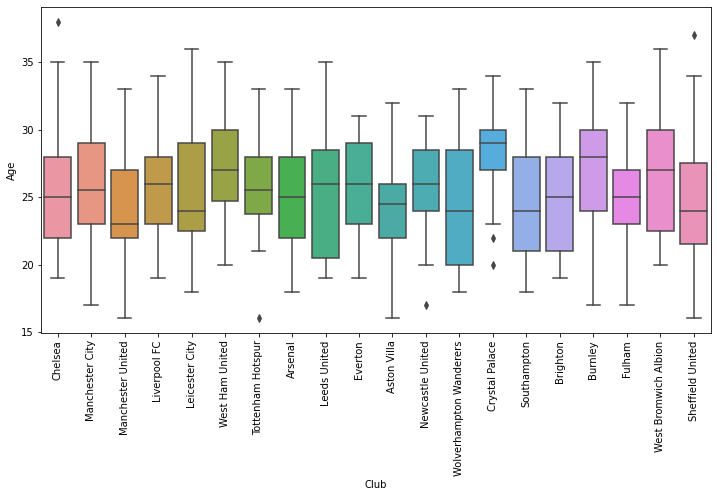

In [89]:
# Average age of each club in the league:
# Using boxplot

plt.figure(figsize=(12,6))
sns.boxplot(x='Club',y='Age',data=epl_df)
plt.xticks(rotation=90)

In [90]:
#verifying the numbers;
num_player = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum())/num_player
data.sort_values(ascending=False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

Text(0.5, 1.0, 'Plot of Clubs vs total Assists')

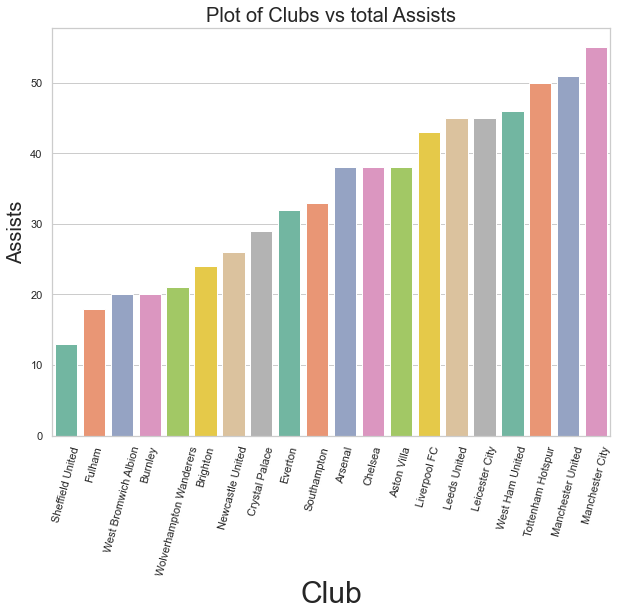

In [101]:
# Total num of assists from each clubs:

Assist_by_clubs = pd.DataFrame(epl_df.groupby('Club',as_index=False)['Assists'].sum())

sns.set_theme(style="whitegrid",color_codes=True)

ax=sns.barplot(x='Club',y='Assists',data=Assist_by_clubs.sort_values(by="Assists"),palette="Set2")
ax.set_xlabel('Club',fontsize=30)
ax.set_ylabel('Assists',fontsize=20)

plt.xticks(rotation=75)
plt.rcParams["figure.figsize"]=(8,8)
plt.title('Plot of Clubs vs total Assists', fontsize=20)


In [103]:
# Top 10 players with most Assists:

top_10_assists = epl_df[['Name','Club','Matches','Assists']].nlargest(n=10, columns='Assists')
top_10_assists

,Name,Club,Matches,Assists
162,Harry Kane,Tottenham Hotspur,35,14
34,Kevin De Bruyne,Manchester City,25,12
51,Bruno Fernandes,Manchester United,37,12
161,Son Heung-min,Tottenham Hotspur,37,10
273,Jack Grealish,Aston Villa,26,10
54,Marcus Rashford,Manchester United,37,9
110,Jamie Vardy,Leicester City,34,9
220,Raphael Dias Belloli,Leeds United,30,9
2,Timo Werner,Chelsea,35,8
136,Aaron Cresswell,West Ham United,36,8


Text(0.5, 1.0, 'Clubs vs total Goals scored')

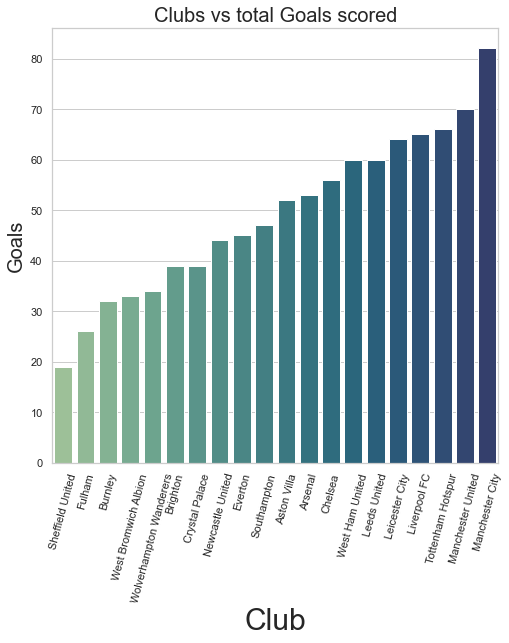

In [107]:
# Total num of goals scored from each clubs:

Goals_by_clubs = pd.DataFrame(epl_df.groupby('Club',as_index=False)['Goals'].sum())

sns.set_theme(style="whitegrid",color_codes=True)

ax=sns.barplot(x='Club',y='Goals',data=Goals_by_clubs.sort_values(by="Goals"),palette="crest")
ax.set_xlabel('Club',fontsize=30)
ax.set_ylabel('Goals',fontsize=20)

plt.xticks(rotation=75)
plt.rcParams["figure.figsize"]=(8,8)
plt.title('Clubs vs total Goals scored', fontsize=20)

In [108]:
# Top 10 Goal scorers:

top_10_GoalScorers = epl_df[['Name','Club','Matches','Goals']].nlargest(n=10, columns='Goals')
top_10_GoalScorers

,Name,Club,Matches,Goals
162,Harry Kane,Tottenham Hotspur,35,23
81,Mohamed Salah,Liverpool FC,37,22
51,Bruno Fernandes,Manchester United,37,18
161,Son Heung-min,Tottenham Hotspur,37,17
214,Patrick Bamford,Leeds United,38,17
237,Dominic Calvert-Lewin,Everton,33,16
110,Jamie Vardy,Leicester City,34,15
267,Ollie Watkins,Aston Villa,37,14
33,İlkay Gündoğan,Manchester City,28,13
191,Alexandre Lacazette,Arsenal,31,13


In [115]:
# players with Most Appearance:

top_10_appearance = epl_df[['Name','Club','Matches',]].nlargest(n=20, columns='Matches')
top_10_appearance

,Name,Club,Matches
80,Andrew Robertson,Liverpool FC,38
83,Georginio Wijnaldum,Liverpool FC,38
108,Kasper Schmeichel,Leicester City,38
109,Youri Tielemans,Leicester City,38
135,Tomáš Souček,West Ham United,38
141,Jarrod Bowen,West Ham United,38
159,Pierre Højbjerg,Tottenham Hotspur,38
160,Hugo Lloris,Tottenham Hotspur,38
212,Stuart Dallas,Leeds United,38
213,Luke Ayling,Leeds United,38


AttributeError: 'AxesSubplot' object has no attribute 'set_xtickslabel'

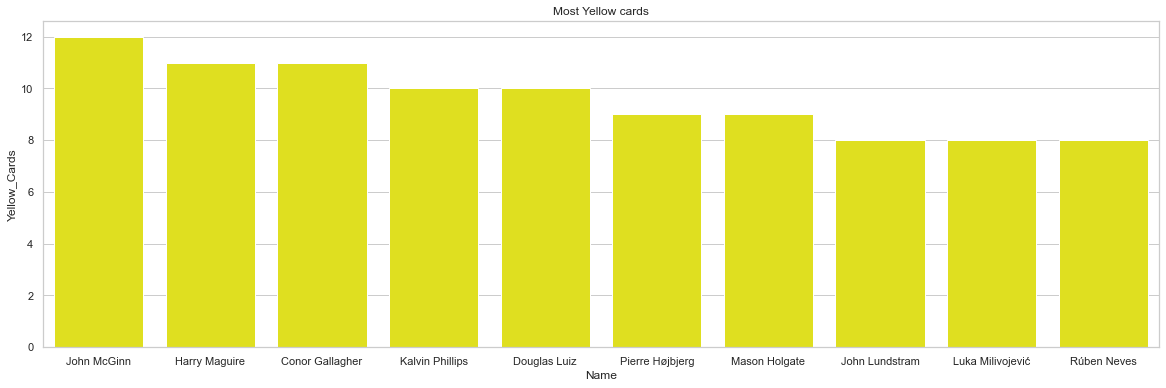

In [116]:
# Most Yellow cards: 

player_yellowCard = epl_df.sort_values(by='Yellow_Cards',ascending=False)[:10]

plt.figure(figsize=(20,6))
plt.title('Most Yellow cards')
plt.ylabel('Num of yellow Cards')

c=sns.barplot(x=player_yellowCard['Name'],y=player_yellowCard['Yellow_Cards'],label='Players',color='yellow')
c.set_xtickslabel(c.get_xtickslabels(),rotation=45)
c